In [32]:
import os
import cv2
import numpy as np
import random
import collections
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

DATA_DIR = './data/train/'  # Folder with cat.x.jpg and dog.x.jpg images
IMG_SIZE = 64
SAMPLES_PER_CLASS = 1000  # Adjust if needed


In [33]:
def load_images_balanced(data_dir, img_size=64, per_class=1000):
    data, labels = [], []

    cat_files = [f for f in os.listdir(data_dir) if f.startswith("cat")]
    dog_files = [f for f in os.listdir(data_dir) if f.startswith("dog")]

    if len(cat_files) < per_class or len(dog_files) < per_class:
        raise ValueError("❌ Not enough cat or dog images in the folder!")

    cat_files = random.sample(cat_files, per_class)
    dog_files = random.sample(dog_files, per_class)

    for file in cat_files:
        path = os.path.join(data_dir, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Could not read {path}")
            continue
        img = cv2.resize(img, (img_size, img_size)).flatten()
        data.append(img)
        labels.append(0)  # Cat

    for file in dog_files:
        path = os.path.join(data_dir, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Could not read {path}")
            continue
        img = cv2.resize(img, (img_size, img_size)).flatten()
        data.append(img)
        labels.append(1)  # Dog

    combined = list(zip(data, labels))
    random.shuffle(combined)
    data[:], labels[:] = zip(*combined)

    return np.array(data), np.array(labels)


In [34]:
print("📥 Loading images...")
X, y = load_images_balanced(DATA_DIR, img_size=IMG_SIZE, per_class=SAMPLES_PER_CLASS)

X = X / 255.0  # Normalize pixel values

print("✅ Loaded:", X.shape)
print("Label distribution:", collections.Counter(y))


📥 Loading images...
✅ Loaded: (2000, 4096)
Label distribution: Counter({1: 1000, 0: 1000})


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (1600, 4096) Test: (400, 4096)


In [36]:
print("🚀 Training SVM...")
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
print("✅ Model trained.")


🚀 Training SVM...
✅ Model trained.


In [37]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"🎯 Accuracy: {acc:.4f}")
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


🎯 Accuracy: 0.5200
📊 Classification Report:
               precision    recall  f1-score   support

         Cat       0.53      0.55      0.54       205
         Dog       0.51      0.49      0.50       195

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



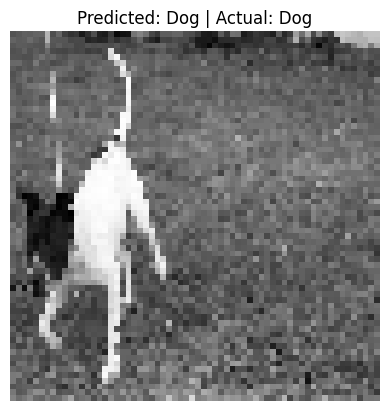

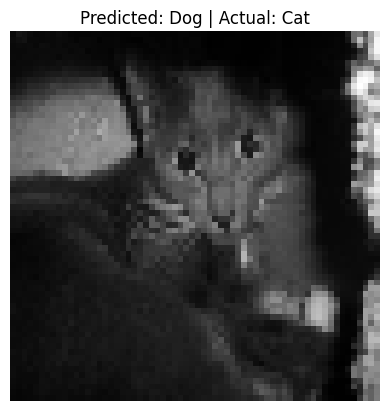

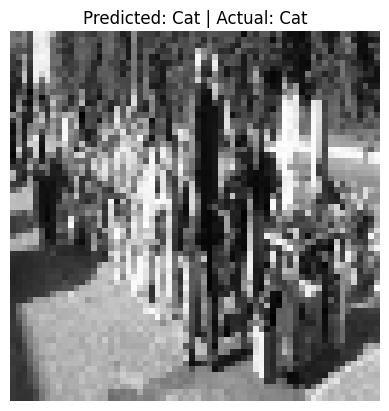

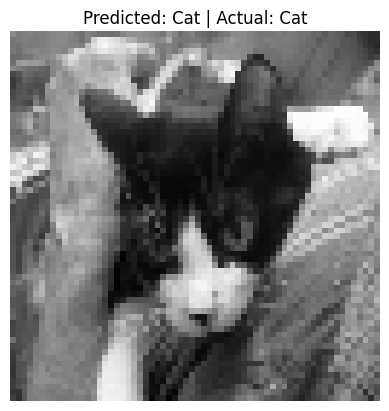

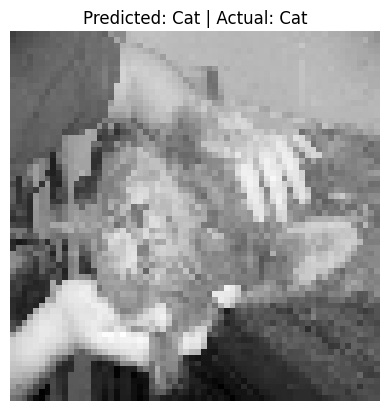

In [39]:
def show_predictions(X_test, y_test, y_pred, img_size=64, n=5):
    indices = random.sample(range(len(X_test)), n)
    for i in indices:
        img = X_test[i].reshape((img_size, img_size))
        true_label = 'Dog' if y_test[i] == 1 else 'Cat'
        pred_label = 'Dog' if y_pred[i] == 1 else 'Cat'
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {pred_label} | Actual: {true_label}")
        plt.axis('off')
        plt.show()

show_predictions(X_test, y_test, y_pred)
